#### NAIVE BAYES CLASSIFIER

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
#importing data
data = pd.read_csv("../Datasets/data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Aptitude                                            1672 non-null   int64
 1   English                                             1672 non-null   int64
 2   Quantitative                                        1672 non-null   int64
 3   Analytical                                          1672 non-null   int64
 4   Domain                                              1672 non-null   int64
 5   Computer Fundamental                                1672 non-null   int64
 6   Coding                                              1672 non-null   int64
 7   Placed                                              1672 non-null   int64
 8   Branch_Agricultural Engineering                     1672 non-null   int64
 9   Branch_Applied Elec

In [4]:
data.head()

,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placed,Branch_Agricultural Engineering,Branch_Applied Electronics and Instrumentation,...,Branch_Electronics and Communications Engineering,Branch_Electronics and Instrumentation Engineering,Branch_Information Technology,Branch_Instrumentation and Control Engineering,Branch_MCA,Branch_Mechanical Engineering,Degree_B. Tech.,Degree_BE,Degree_M. Tech.,Degree_MCA
0,38,47,13,53,35,7,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,60,70,60,50,40,33,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,58,73,33,67,30,60,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,36,33,40,33,45,33,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,60,60,55,65,40,73,11,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
X = data.drop("Placed",axis=1)
y = data["Placed"]

In [6]:
np.random.seed = 42
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1337, 24), (1337,), (335, 24), (335,))

In [8]:
np.random.seed=42
model = GaussianNB()

In [9]:
model.fit(X_train,y_train)

GaussianNB()

In [10]:
y_preds = model.predict(X_test)

In [11]:
model.score(X_test, y_test)*100

77.31343283582089

In [12]:
from sklearn.metrics import classification_report, roc_curve

In [14]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76       180
           1       0.70      0.90      0.79       155

    accuracy                           0.77       335
   macro avg       0.79      0.78      0.77       335
weighted avg       0.80      0.77      0.77       335



In [15]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

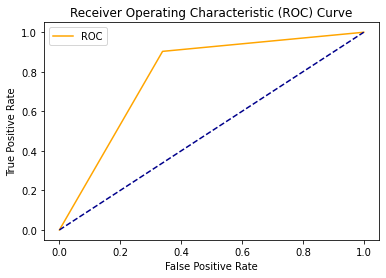

In [16]:
fpr, tpr, threshold = roc_curve(y_test, y_preds)
plot_roc_curve(fpr, tpr)

In [13]:
# saving the trained model
pkl.dump(model, open("../Models/naive_bayes.pkl", "wb"))
print("Model saved successfully")

Model saved successfully
